<a href="https://colab.research.google.com/github/Harsha975/projectwithsandy/blob/main/coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/coconut_dis'
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/pew2',
                   seed=42,ratio=( .8 , .2),
                   group_prefix=None)

Copying files: 5080 files [02:35, 32.71 files/s] 


In [ ]:
import os
import glob as gb
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Activation

In [ ]:
TRAIN_DIR="/content/drive/MyDrive/pew2/train"
TEST_DIR="/content/drive/MyDrive/pew2/val"
BATCH_SIZE=64

In [ ]:
for folder in os.listdir(TEST_DIR):
    jpg_files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder +'/*.jpg'))
    jpeg_files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder +'/*.jpeg'))
    files = jpg_files + jpeg_files
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 885 in folder WCLWD_Yellowing
For training data, found 855 in folder WCLWD_Flaccidity
For training data, found 862 in folder WCLWD_DryingofLeaflets
For training data, found 494 in folder CCI_Leaflets
For training data, found 792 in folder CCI_Caterpillars


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
class_names = ['CCI_Caterpillars','CCI_Leaflets','WCLWD_DryingofLeaflets','WCLWD_Flaccidity','WCLWD_Yellowing']

Image shape (750, 750, 3)
Image shape (750, 750, 3)
Image shape (750, 750, 3)
Image shape (1920, 1080, 3)
Image shape (750, 750, 3)
Image shape (750, 750, 3)
Image shape (1980, 3520, 3)
Image shape (750, 750, 3)
Image shape (1920, 1080, 3)
Image shape (416, 416, 3)
Image shape (1920, 1080, 3)
Image shape (750, 750, 3)
Image shape (1920, 1080, 3)
Image shape (416, 416, 3)
Image shape (750, 750, 3)
Image shape (750, 750, 3)
Image shape (750, 750, 3)
Image shape (750, 750, 3)


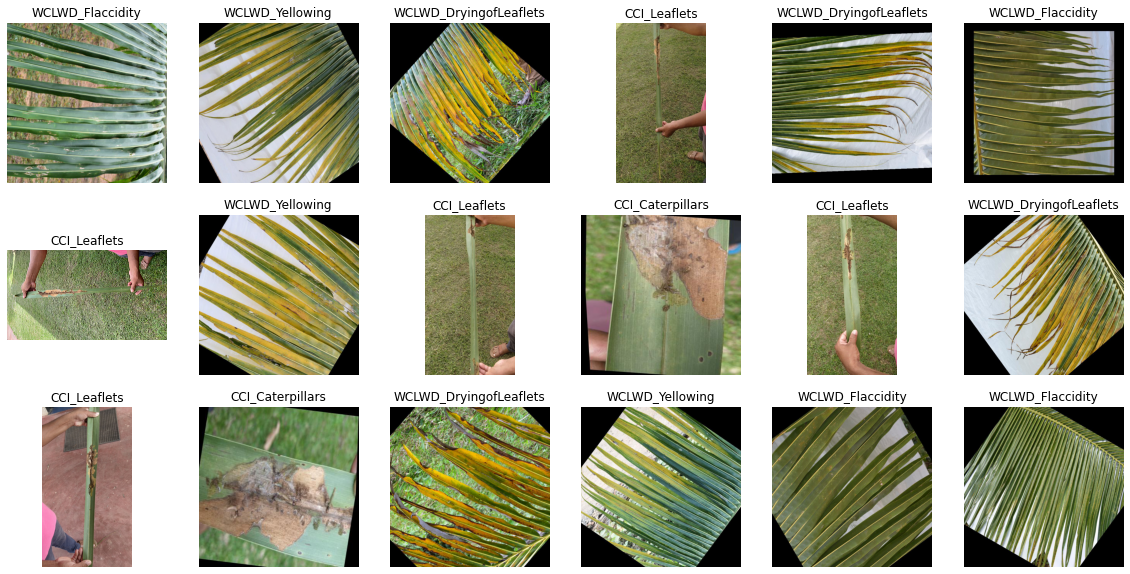

In [ ]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/pew2/train/", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 5, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

In [ ]:
history = classifier.fit(training_set,
                         epochs = 10,
                         validation_data = test_set)


classifier.save('model1.h5') 